# 下載 MNIST 資料
---
首先，匯入 keras 和相關模組。

In [2]:
# 匯入 numpy 和 pandas 模組，numpy 是 python 的程式庫，支援維度陣列與矩陣運算。
# pandas 則提供檔案存取和數據操縱。
import numpy as np
import pandas as pd
# 從 keras.utils 匯入 to_categroical，因為後續要將 label 標籤 轉換成 one-hot encoding。
# 設定 seed 可以讓每次產生隨機值時，都會有相同的輸出。(若使用GPU，則無法每次皆相同)
seed = 1234
np.random.seed(seed)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, metrics

from tensorflow.keras import models
import tensorflow as tf
tf.random.set_seed(seed)


from tensorflow.keras.datasets import mnist,cifar10
(X_train_image, y_train_label),\
    (X_test_image, y_test_label) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


Keras 中已經提供許多機器學習常用的數據集，包括波士頓房地產數據、CIFAR10、和這次範例要使用的手寫數據集。所以先從 keras 匯入 MNIST。

第一次執行 mnist.load_data() ，程式會檢查目錄是否已經有檔案，如果沒有就會自動下載，所以第一次可能都會比較久。之後再次執行時不用再次下載就會快速很多。


In [3]:
#from tensorflow.keras.datasets import mnist,cifar10 #加分題資料改成使用cifar 10



先來看看 MNIST 資料數據集的筆數，還有訓練資料的組成。

可以看到 train 訓練資料有 60000 筆，test 測試資料有 10000 筆。

訓練資料是由 images 和 labels 所組成共 60000 筆， images 是單色的數字影像，labels 是數字影像對應的真實值。

In [4]:
#print('train data : ', len(X_train_image))
#print('test data : ', len(X_test_image))

In [5]:
#print('x_train_image : ', X_train_image.shape)
#print('y_train_label : ', y_train_label.shape)

# 建立 plot_image 函式來顯示數字影像
---
來看看剛剛匯入的手寫數字圖像。



In [6]:
import matplotlib.pyplot as plt
def plot_image(image):
    # 設定圖形顯示大小
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    # 使用 plt.imshow() 顯示圖像，傳入參數是 28 X 28 的圖形，
    # cmap 參數設定為 binary 以黑白灰階顯示
    plt.imshow(image, cmap = 'binary')
    # 開始繪圖
    plt.show()

傳入訓練集第一筆資料，來看看他的影像。

In [7]:
#plot_image(X_train_image[200])

看看第一筆資料的 label

In [8]:
#y_train_label[200]

# 查看多筆資料 images 與 labels
---
定義 plot_images_labels_prediction() 函式，傳入以下參數：images(數字影像)、labels(對應數字真實值)、prediction(預測結果)、idx(開始顯示影像的index)、num(要顯示的資料筆數，預設是10，不超過25)


In [9]:
def plot_images_labels_prediction(images, labels, prediction,idx, num = 10):

    # 設定顯示圖形大小
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    # 如果顯示筆數大於25 則將他設定為25 以避免錯誤
    if num > 25: num = 25
    # 使用 for 迴圈依序畫出 num 個數字圖形
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i) # 建立 5 X 5 的 subgraph 子圖形
        ax.imshow(images[idx], cmap = 'binary') # 畫出 subgraph 子圖形
        title = "label=" + str(labels[idx]) # 設定子圖形 title 顯示標籤欄位
        if len(prediction) > 0: # 如果 prediction 有傳入值
            title += ",predict=" + str(prediction[idx]) # 將 prediction 加入 title
        ax.set_title(title, fontsize = 12) # 設定標題大小
        ax.set_xticks([]); ax.set_yticks([]) # 設定不顯示刻度
        idx += 1 # 讀取下一筆
    plt.show() # 開始畫圖

顯示訓練資料前 10 筆資料。不過目前還沒有預測結果所以傳入空 list ，由第 0 筆開始顯示至第 9 筆。

In [10]:
#plot_images_labels_prediction(X_train_image, y_train_label, [], 0, 10)

查看 test 測試資料筆數，可以看到共10000筆資料。

In [11]:
#print('x_test_image : ', X_test_image.shape)
#print('y_test_label : ', y_test_label.shape)

顯示測試資料前 10 筆資料圖形。

In [12]:
#plot_images_labels_prediction(X_test_image, y_test_label, [], 0, 10)

# feature(數字影像的特徵值)資料預處理


In [13]:
X_Train = X_train_image.astype('float32')
X_Test = X_test_image.astype('float32')
X_Train_normalize = X_Train / 255
X_Test_normalize = X_Test / 255

###########################
y_TrainOneHot = to_categorical(y_train_label)
y_TestOneHot = to_categorical(y_test_label)
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,BatchNormalization,Dense,Flatten
model = models.Sequential()
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(rate=0.5))

In [14]:
######(X_train_image, y_train_label), (X_test_image, y_test_label) = cifar10.load_data()  ###### 使用cifar10
#########
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

查看一下每一個數字影像都變成 784 個 float 數字。

In [15]:
print('x_train : ', X_Train.shape)
#print('x_test : ', X_Test.shape)
print(model.summary())
y_train_label[:5]

x_train :  (50000, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                          

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

將 image 的數字標準化。

因為圖像的數字是介於 0 到 255，所以最簡單的方法就是除以 255。

In [16]:
# 將訓練資料和測試資料轉換為 float32 並歸一化
########X_Train = X_train_image.astype('float32')
########X_Test = X_test_image.astype('float32')
########X_Train_normalize = X_Train / 255
########X_Test_normalize = X_Test / 255

# 將標籤轉換為 one-hot 編碼
########y_TrainOneHot = to_categorical(y_train_label)
########y_TestOneHot = to_categorical(y_test_label)

#X_Train_normalize = X_Train / 255
#X_Test_normalize = X_Test / 255

# labels(數字影像對應真實值)資料預處理
---
先來查看一下訓練資料 label 標籤欄位前五筆資料，可以看到這是 0 ~ 9 的單一數字。

使用我們開頭匯入的 to_categorical函式，傳入 label 標籤，將他們轉換成 one-hot encoding。

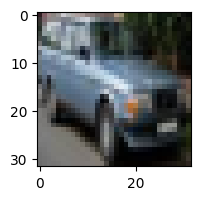

In [17]:
plot_image(X_train_image[201])
#y_TrainOneHot = to_categorical(y_train_label)
#y_TestOneHot = to_categorical(y_test_label)

查看轉換過後的結果。

# 建立 MLP 模型
---
接下來建立我們的多層感知器模型，輸入層共有 (28*28) 個神經元，隱藏層 32 個神經元，最後輸出層共有 10 個神經元。

首先先匯入所需要的模組。

In [18]:
#from tensorflow.keras import layers, metrics
#from tensorflow.keras.layers import Dense,InputLayer,Flatten
#from tensorflow.keras import models
#import tensorflow as tf
#tf.random.set_seed(seed)

建立 Sequential 一個線性堆疊模型，後續只要使用 model.add() 將個神經網路層依序加入模型即可。

In [19]:
#model = models.Sequential()

建立輸入層
1.   設定輸入層神經元 維度為 (28,28,1)。
2.   把(28,28,1)攤平，變成一維

In [20]:
#model.add(InputLayer(input_shape=(32,32,3))) #加分題輸入資料的shape為(32,32,3)
#model.add(Flatten())

建立隱藏層。
1.   定義隱藏層神經元 32 個。
2.   設定激活函數為 sigmoid。

可以在keras官方文件查看可以使用的Activation function
https://keras.io/zh/activations/



建立輸出層總共 10 個神經元，對應要分類的數字類別 0 ~ 9 。設定激活函數為 softmax ，這樣每一個神經元的輸出結果可視為預測每一個數字的機率。

In [21]:
#model.add(Dense(10, kernel_initializer = 'normal', activation = 'softmax'))

來看看我們建好的模型的摘要。

In [22]:
#print(model.summary())

# 進行訓練
---
首先使用 compile ，對訓練模型進行設定。相關參數有：
1.   loss : 設定損失函數，這邊使用 CategoricalCrossentropy。另外也還有很多不同的函數，可以到 keras 官網查詢，不同的模型和資料都有他們最適合的函數。
2.   optimizer : 設定優化方法，這邊使用 sgd 方法。同樣 keras 也提供很多種優化方法。https://keras.io/zh/optimizers/
1.   metrics : 設定評估模型的方式是 accuracy 準確率。

In [23]:
#loss_function = 'CategoricalCrossentropy'
#optimize_function = 'Adam' # Adadelta , Adagrad ,Adam ,Adamax ,FTRL ,Nadam ,RMSprop ,sgd
#model.compile(loss = loss_function, optimizer = optimize_function, metrics = ['accuracy'])

開始訓練，過程都會儲存在 train_history 變數，其中的相關參數：
1.   設定 validation_split = 0.2 ，將訓練資料 80% 作為訓練，20% 作為驗證資料。
1.   設定 epochs 執行 10 次訓練週期。每一批次 batch_size 有 200 筆資料。
2.   verbose = 2，顯示訓練過程。

In [24]:
#print('x_train_image : ', X_train_image.shape)
#print('y_train_label : ', y_train_label.shape)
#print('x_test_image : ', X_test_image.shape)
#print('y_test_label : ', y_test_label.shape)

In [25]:
#y_TrainOneHot = to_categorical(y_train_label)
#y_TestOneHot = to_categorical(y_test_label)

In [26]:
#print('X_Train_normalize shape:', X_Train_normalize.shape)
#print('y_TrainOneHot shape:', y_TrainOneHot.shape)

In [27]:
#print('x_train : ', X_Train.shape)
#print(model.summary())
#y_train_label[:5]

In [28]:
#plot_image(X_train_image[201])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

loss_function = 'CategoricalCrossentropy'#CategoricalCrossentropy
optimize_function = 'Adam'


early_stop = EarlyStopping(monitor='val_loss', patience=2)
model.compile(loss = loss_function, optimizer = optimize_function,metrics = ['accuracy'])

train_history = model.fit(x = X_Train_normalize, y = y_TrainOneHot,
                            validation_split = 0.2, epochs = 65, batch_size = 64,
                            verbose = 1)#, shuffle=True)
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

Epoch 1/65
625/625 [==============================] - 17s 14ms/step - loss: 1.9348 - accuracy: 0.2858 - val_loss: 1.7363 - val_accuracy: 0.3828
Epoch 2/65
625/625 [==============================] - 8s 12ms/step - loss: 1.5507 - accuracy: 0.4284 - val_loss: 1.5230 - val_accuracy: 0.4597
Epoch 3/65
625/625 [==============================] - 7s 12ms/step - loss: 1.3406 - accuracy: 0.5153 - val_loss: 1.2474 - val_accuracy: 0.5356
Epoch 4/65
625/625 [==============================] - 8s 13ms/step - loss: 1.2055 - accuracy: 0.5755 - val_loss: 0.9796 - val_accuracy: 0.6603
Epoch 5/65
625/625 [==============================] - 8s 13ms/step - loss: 1.0927 - accuracy: 0.6200 - val_loss: 0.9954 - val_accuracy: 0.6422
Epoch 6/65
625/625 [==============================] - 7s 12ms/step - loss: 1.0066 - accuracy: 0.6533 - val_loss: 0.8861 - val_accuracy: 0.6879
Epoch 7/65
625/625 [==============================] - 8s 13ms/step - loss: 0.9560 - accuracy: 0.6724 - val_loss: 0.8014 - val_accuracy: 0.721

建立函式顯示訓練過程，會將每一個訓練週期的 accuracy 和 loss 以圖表顯示出來。

In [30]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

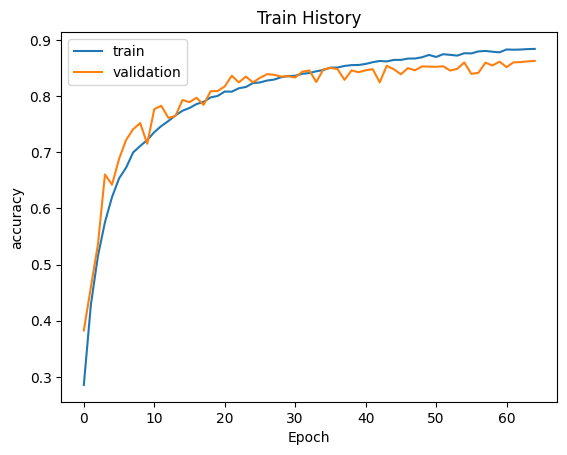

In [31]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

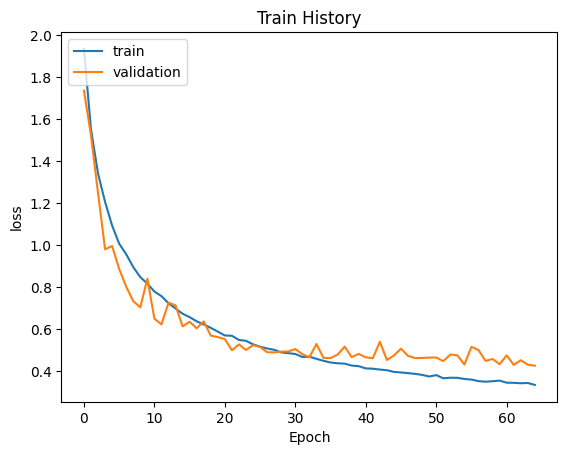

In [32]:
show_train_history(train_history, 'loss', 'val_loss')

# 以測試資料評估模型準確率
---


In [33]:
scores = model.evaluate(X_Test_normalize, y_TestOneHot)
print()
print('accuracy = ', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4490 - accuracy: 0.8587

accuracy =  0.8586999773979187


執行預測，將結果存到 prediction 中。

In [34]:
prediction = np.argmax(model.predict(X_Test), axis = -1)

313/313 [==============================] - 2s 3ms/step


In [35]:
prediction

array([5, 8, 9, ..., 7, 1, 7])

顯示 10 筆預測結果。

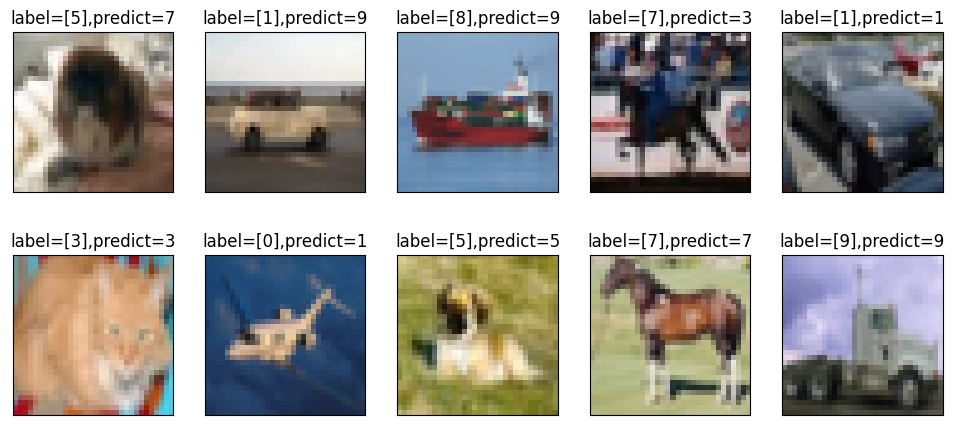

In [36]:
plot_images_labels_prediction(X_test_image, y_test_label, prediction, idx = 200)

In [37]:
#y_test_label = y_test_label.reshape(10000)

混淆矩陣

In [38]:
#使用 pandas 中的 crosstab 能夠很方便的建立混淆矩陣。
#pd.crosstab(y_test_label, prediction, rownames = ['label'], colnames = ['predict'])

In [39]:
#from google.colab import files

#uploaded = files.upload()

In [40]:
# 確保上傳的圖片已經被儲存到Colab的環境中
#uploaded_image_path = list(uploaded.keys())[0]  # 取得上傳圖片的路徑

#print(f"上傳的圖片路徑: {uploaded_image_path}")

In [41]:
#import numpy as np
#from google.colab import files #匯入套件
#import pandas as pd
#from PIL import Image, ImageOps
#import os
#import matplotlib.pyplot as plt
#from google.colab import drive

#img_data = Image.open(uploaded_image_path)
#newImg = ImageOps.invert(img_data)
#img_arr = np.array(newImg)

#list1 = []
#for i in range(len(img_arr)):
  #joe = []
  #for j in range(len(img_arr[i])):
   # sum = img_arr[i][j][0]+img_arr[i][j][1]+img_arr[i][j][2]
    #joe.append(sum)
  #list1.append(joe)
#ha = [list1]
#img_list = np.array(ha)

#print(img_list)


In [42]:
#from skimage.transform import resize

# 將圖片調整為模型期望的形狀
#resized_img = resize(img_arr, (28, 28, 1), mode='constant')

# 將圖片轉換為numpy array
#img_list = np.array([resized_img])

# 顯示調整大小後的圖片
#plt.imshow(resized_img[:, :, 0], cmap='gray')
#plt.show()

In [43]:
#plot_image(img_list[0])

In [44]:
#prediction_2 = np.argmax(model.predict(img_list), axis = -1)
#prediction_2

In [45]:
#img_Train = img_list.astype('float32')
#img_Train_normalize = img_Train / 255
#plot_images_labels_prediction(img_list,[2], prediction_2,idx=0,num=1)